<a href="https://www.kaggle.com/code/aicortex/find-ideal-learning-rate-tensorflow-classification?scriptVersionId=207777896" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### 🚀 Importing Libraries
Before we jump into the exciting world of finding the ideal learning rate, let's assemble our toolbox! 🧰 Here, we are importing:

- **TensorFlow** for building and training our model.
- **NumPy** to perform mathematical operations. 🧮
- **Pandas** to organize and manipulate our data. 📊
- **Matplotlib** and **Seaborn** for some cool visualizations. 🎨
- **Scikit-learn's datasets and train-test split** to generate data and split it into training and testing sets. 📚

We're also setting Seaborn's style to make our plots extra fancy. ✨


In [1]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.model_selection import train_test_split

### 🎡 Generating Circular Data
Here we are creating some **synthetic data** using the `make_circles` function from `scikit-learn`. 🌀

- **`n_samples=1000`**: We're generating 1,000 data points.
- **`noise=0.1`**: Adding a little noise to make the data more interesting. 🎵
- **`random_state=42`**: For reproducibility—because science! 🧪
- **`factor=0.5`**: This adjusts the gap between the inner and outer circles.

The result? A pair of NumPy arrays:
- `X`: Features (shape: `(1000, 2)`).
- `y`: Labels (shape: `(1000,)`).

Ready to dive into these circles? 🏊‍♂️


In [2]:
X, y = make_circles(n_samples=1000,
    noise=0.1,
    random_state=42,
    factor=0.5,
    )

X.shape, y.shape

((1000, 2), (1000,))

### 🎨 Visualizing the Circular Dataset
Time to turn numbers into colors! 🌈 We’re transforming our circular dataset into a **Pandas DataFrame** for easier handling, and then visualizing it using **Seaborn**. 📊

- **Features**: Named as "Feature 1" and "Feature 2".
- **Class**: Contains the labels (0 or 1) indicating which circle a point belongs to.

Here’s what happens next:
1. **Scatter plot**:
   - `sns.scatterplot`: Visualizes the data points.
   - `hue="Class"`: Colors the points based on their class.
   - `palette=['blue', 'red']`: Blue for one class, red for the other. 🔵🔴
   - `alpha=0.7`: Adds some transparency for overlapping points.

2. **Labels & Title**:
   - Makes the plot more informative.

Now we can **see** our circles instead of just imagining them. Isn't data visualization awesome? 🚀


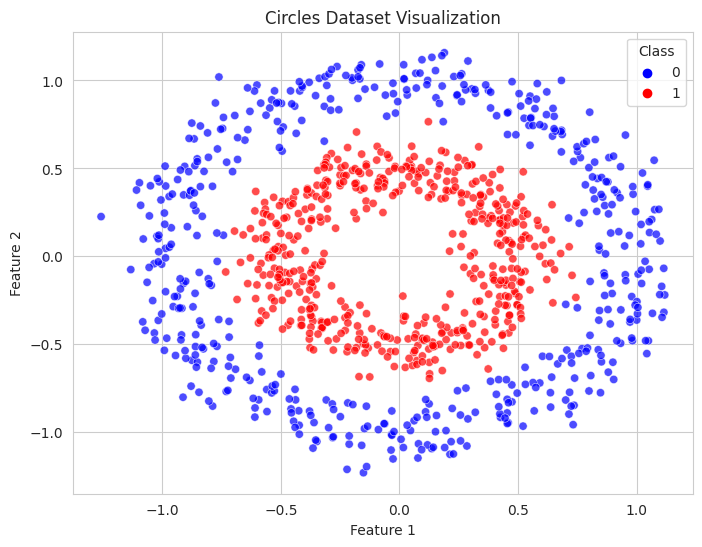

In [3]:
data = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
data["Class"] = y

plt.figure(figsize=(8, 6))
scatter_plot = sns.scatterplot(data=data, x="Feature 1", y="Feature 2", hue="Class", palette=['blue', 'red'], alpha=0.7)

plt.title("Circles Dataset Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()

### 🖼️ Plotting the Decision Boundary
This function is where the **magic happens**! ✨ It helps us visualize how well our model is classifying the data by plotting the **decision boundary**. Here's how it works step by step:

1. **Define Grid**:
   - Creates a meshgrid (`xx`, `yy`) over the feature space, ensuring no region is left uncharted! 🌍
   - Adjusts the boundaries slightly for better visualization.

2. **Make Predictions**:
   - Flattens the grid (`x_in`) into pairs of points and feeds them to the model.
   - Checks if the model is doing:
     - **Multiclass classification**: Uses `np.argmax` to pick the class with the highest probability.
     - **Binary classification**: Rounds the predictions to `0` or `1`. 🔢

3. **Plot Decision Boundary**:
   - Fills the grid regions with colors based on predicted classes. 🌈
   - Adds data points (`X` and `y`) on top for context.

4. **Extras**:
   - Custom color map: **`plt.cm.RdYlBu`** (Red, Yellow, Blue).
   - Adjusts plot limits for a clean view.

With this, you'll have a vibrant plot showing exactly where your model shines and where it might need a little help. 🚀


In [4]:
def plot_decision_boundary(model, X, y):

  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  x_in = np.c_[xx.ravel(), yy.ravel()]
  y_pred = model.predict(x_in)

  if model.output_shape[-1] > 1:
    print("doing multiclass classification...")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

### 🧠 Building Our First Model: `simple_model_1`
We’re assembling a simple but powerful neural network! ⚙️ Here’s the breakdown of what we’re doing:

1. **Setting the Seed**:
   - `tf.random.set_seed(42)` ensures reproducibility. No surprises here! 🎲

2. **Model Architecture**:
   - Using TensorFlow’s `Sequential` API to stack layers like a sandwich. 🥪
   - Layers:
     - **Input layer**: Accepts input with 2 features.
     - **Hidden layers**:
       - `hiden_1`: 4 neurons with ReLU activation. 🚀
       - `hiden_2`: 8 neurons with ReLU activation.
       - `hiden_3`: 4 neurons with ReLU activation.
     - **Output layer**: 1 neuron with Sigmoid activation for binary cl🔵sification. 🟢🔴

3. **Compilation**:
   - **Loss**: `BinaryCrossentropy` to minimize classification error.
   - **Optimizer**: `Adam` with a learning rate of `0.001`—our model’s caffeine shot! ☕
   - **Metrics**: `BinaryAccuracy` to measure performance.

4. **Summary**:
   - Shows the structure, output shapes, and parameters of the model.
   - Total parameters: **93** (all trainable). That’s lightweight! 🪶

This model is ready to take on the task of classifying circles. Let’s see how it performs! 🎉


In [6]:
tf.random.set_seed(42)


model_1 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(2, ), name='input layer'),
    tf.keras.layers.Dense(units=4, name='hiden_1', activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(units=8,  name='hiden_2', activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(units=4,  name='hiden_3', activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(units=1,   name='output',  activation = tf.keras.activations.sigmoid)
    
], name='simple_model_1')


model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = [tf.keras.metrics.BinaryAccuracy()],
    
)

model_1.summary()

Model: "simple_model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hiden_1 (Dense)                 │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiden_2 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiden_3 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93 (372.00 B)

 Trainable params: 93 (372.00 B)

 Non-trainable params: 0 (0.00 B)

### 🖼️ Visualizing the Model Architecture
It's time to take a closer look at our neural network! 👀 Using the `plot_model` function from TensorFlow, we generate a detailed diagram of our model. Here's what's included:

- **`show_shapes=True`**: Displays the shapes of the input and output tensors for each layer. 📐
- **`show_dtype=True`**: Shows the data type of each layer’s output. Important for debugging! 🛠️
- **`show_layer_names=True`**: Includes the names of all layers, making it easier to identify them. 🏷️
- **`expand_nested=True`**: Expands nested layers (though we don’t have any here).
- 1*`dpi=200`**: Makes the image high-resolution and crystal clear. 🖼️✨
- **`show_layer_activations=True`**: Displays the activation function used in each layer (ReLU, Sigmoid, etc.). 🚀
- **`show_trainable=True`**: Indicates whether the layer parameters are trainable or frozen. 🔓

With this visualization, we can easily understand the structure and flow of data through our model. It’s like peeking inside the brain of our AI! 🧠✨


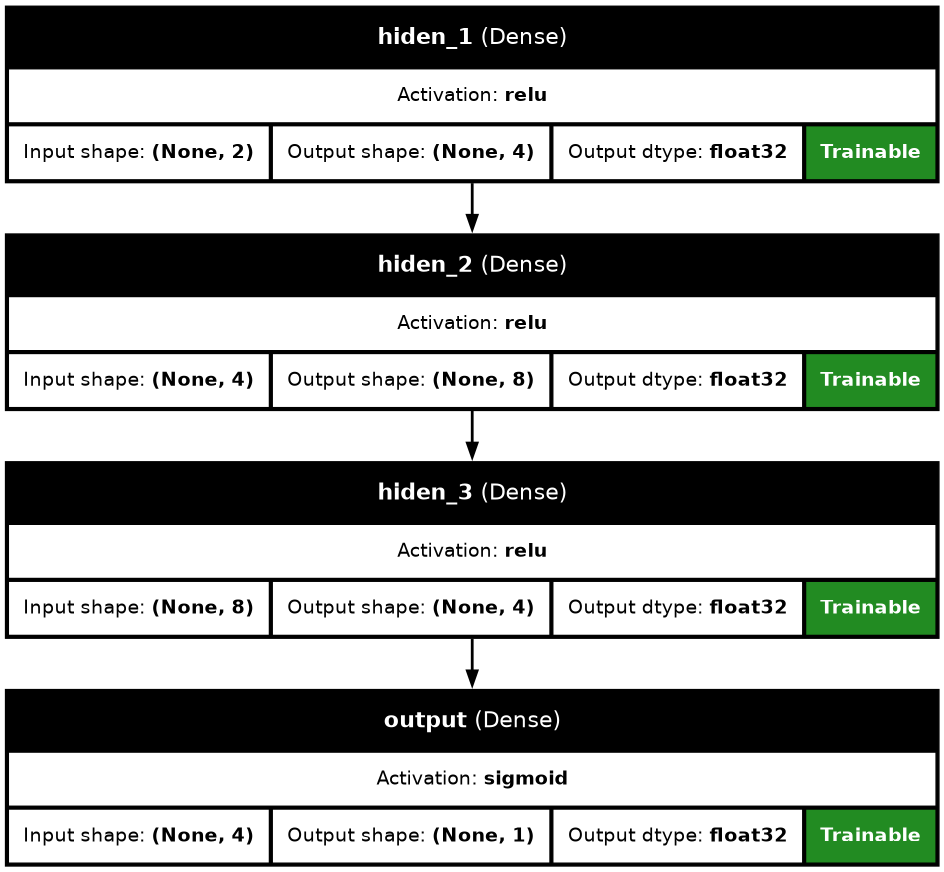

In [7]:
plot_model(model_1, show_shapes=True, show_dtype=True, show_layer_names=True, 
           expand_nested=True, dpi=100, 
           show_layer_activations=True, show_trainable=True)

### 📈 Implementing a Learning Rate Scheduler
Here, we’re introducing a **learning rate scheduler** to dynamically adjust the learning rate during training. 🚀 This is particularly useful for identifying the optimal learning rate. Let’s break it down:

1. **`LearningRateScheduler` Callback**:
   - This callback adjusts the learning rate at the start of each epoch.
   - Formula: `min(1e-4 * 10**(epoch/20), 1.0)`:
     - Starts with a small learning rate of
     $ ( 1 \times 10^{-4} ) $ .
     - Increases exponentially as training progresses.
     - Caps at 1.0 to avoid unstable training. 🚦

2. **Training the Model**:
   - Using `model.fit` to train `model_1` on `X_train` and `y_train`.
   - Parameters:
     - **`epochs=100`**: Training for 100 epochs to observe the effect of different learning rates. 🕒
     - **`verbose=1`**: Displays progress during training.
     - **`callbacks=lr_scheduler`**: Includes our scheduler for dynamic learning rate adjustments.

This strategy will help us pinpoint the learning rate where the model performs best. Let’s watch the magic happen! ✨

In [8]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: min(1e-4 * 10**(epoch/20), 1.0))

history = model_1.fit(X_train, y_train, 
                      epochs=100, verbose=1,
                      callbacks=lr_scheduler)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.4878 - loss: 0.6878 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.5212 - loss: 0.6866 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.5245 - loss: 0.6853 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.5332 - loss: 0.6839 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.5297 - loss: 0.6824 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.5205 - loss: 0.6807 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.5096 - loss: 0.6789 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.5208 - loss: 0.6768 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0

### 📊 Evaluating the Model and Visualizing the Decision Boundary
Now that the model has been trained, it's time to **evaluate its performance** and **visualize the decision boundary**. Here's the step-by-step breakdown:

1. **Model Evaluation**:
   - `model_1.evaluate(X_train, y_train)`: Checks the performance on the training data. 🚂
   - `model_1.evaluate(X_test, y_test)`: Evaluates how well the model generalizes on unseen test data. 📊
   - Results:
     - **Binary accuracy**: Around 48-49%, indicating the model isn't performing optimally yet. There’s room for improvement! ⚠️
     - **Loss**: Measures the prediction error.

2. **Plotting the Decision Boundary**:
   - Uses our custom `plot_decision_boundary` function.
   - The **decision boundary** (colored regions) shows the areas the model associates with each class (blue or red). 🎨
   - Data points (dots) are overlaid, with colors based on their actual class.

#### Observations:
- The model struggles to capture the complex circular pattern, as evident from the inaccuracies in the decision boundary.
- Time to fine-tune the model or explore more advanced architectures! 🚀


In [9]:
model_1.evaluate(X_train, y_train)
model_1.evaluate(X_test, y_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.4806 - loss: 0.7304  
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.4907 - loss: 0.7256  


[0.7211647033691406, 0.5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


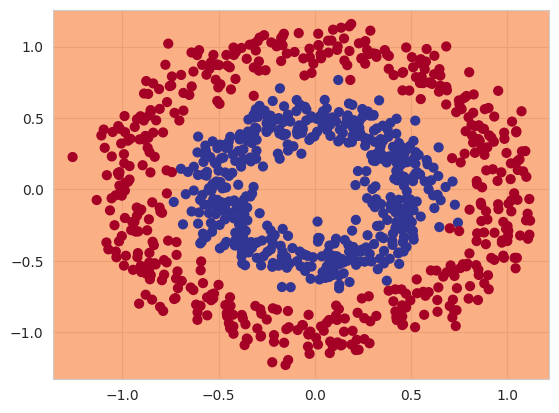

In [10]:
plot_decision_boundary(model_1, X, y)

### 📉 Visualizing Training Metrics Over Epochs
Let’s dive into the **performance trends** during training with a line plot of key metrics. 🕵️‍♂️ Here’s what we’re analyzing:

1. **Metrics in the Plot**:
   - **`binary_accuracy` (blue line)**: Shows how well the model is classifying data. It starts low and improves over epochs, reflecting better performance. 🟦
   - **`loss` (orange line)**: Represents prediction error. A decreasing loss indicates the model is learning. 🟧
   - **`learning_rate` (green line)**: Adjusted dynamically by our scheduler. It starts small and grows exponentially over epochs. 🟩

2. **Key Observations**:
   - Accuracy improves as learning progresses, peaking before it starts fluctuating due to overfitting or instability at higher learning rates.
   - Loss decreases initially but begins to increase again towards the end, possibly due to a learning rate that’s too high. ⚠️
   - The learning rate visualization helps pinpoint the optimal range for future training.

By examining this plot, we can determine the **sweet spot** for the learning rate where accuracy is maximized, and loss is minimized. 🌟


<Axes: >

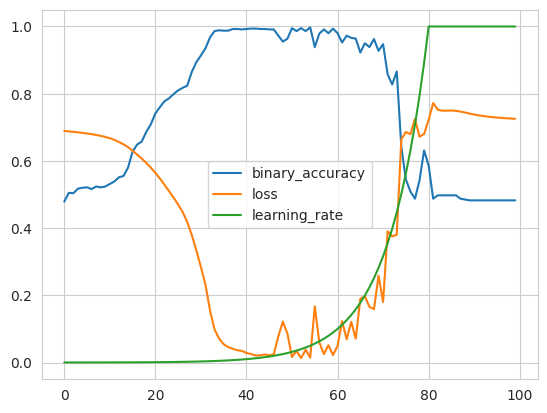

In [11]:
pd.DataFrame(history.history).plot()

### 📉 Plotting Learning Rate vs. Loss
Let’s analyze the relationship between the **learning rate** and the **loss** to identify the ideal learning rate for training. Here’s what’s happening:

1. **Learning Rate Range**:
   - We generate an exponentially increasing range of learning rates using:  
     $$ \text{lrs} = 1e{-4} \times (10^{\frac{\text{epoch}}{20}}) $$
   - The `np.clip` function ensures the learning rates stay within the range of $(10^{-4})  to  (1.0)$.

2. **Plot Details**:
   - **X-axis**: Learning rates (log scale for better visualization).
   - **Y-axis**: Loss values recorded during training.
   - **Semilog Plot**: `plt.semilogx` ensures the x-axis is logarithmic, making it easier to observe changes across large scales. 📊

3. **Key Observations**:
   - The loss decreases sharply at certain learning rates, hitting a minimum aroundm $(10^{-2})$ (a potential sweet spot). 🌟
   - At higher learning rates, the loss begins to rise again, signaling instability. ⚠️

#### Why This Matters:
- This plot helps us choose the **optimal learning rate**, balancing faster convergence with stable training. 🚀
able training. 🚀


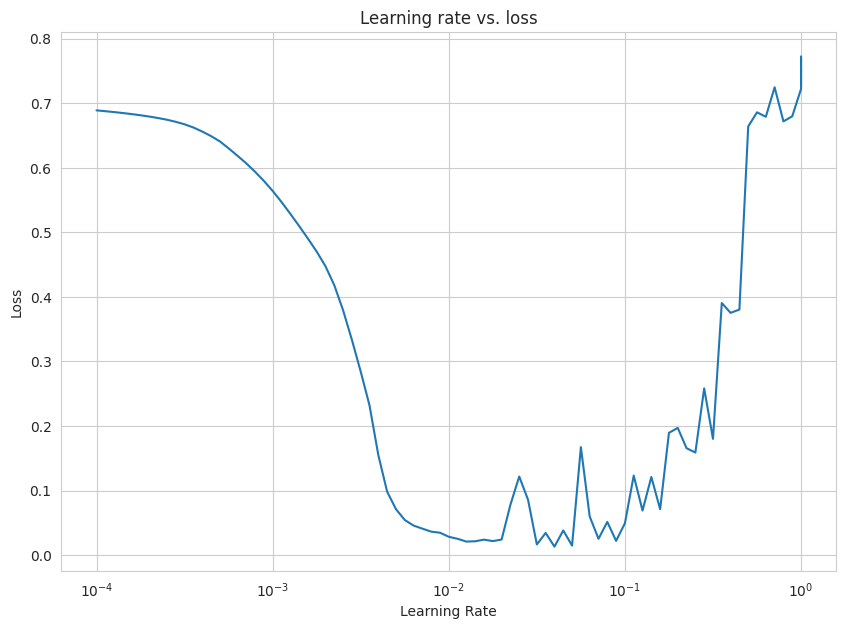

In [12]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
lrs = np.clip(lrs, 1e-4, 1.0)
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

### 📈 Plotting Without `semilogx`: What Happens?
In this plot, we visualize **learning rate vs. loss** without using a logarithmic scale for the learning rate. Let's examine the differences:

1. **The Issue**:
   - When we use a linear scale for the learning rate, the smaller learning rates (e.g., \(10^{-4}\)) are compressed on the left side of the graph. This makes it hard to observe the impact of these smaller learning rates on the loss. 🚨
   - The plot lacks clarity for learning rates in the lower range, making it difficult to analyze trends effectively.

2. **Why Logarithmic Scale Is Better**:
   - A logarithmic scale spreads out the smaller values, allowing us to see how the loss decreases with finer adjustments to the learning rate.
   - It provides a more accurate and visually interpretable representation of the relationship between learning rate and loss. 🌟

#### Lesson:
- For analyzing learning rates over a wide range, always prefer **logarithmic scales** to avoid losing important details! 📊


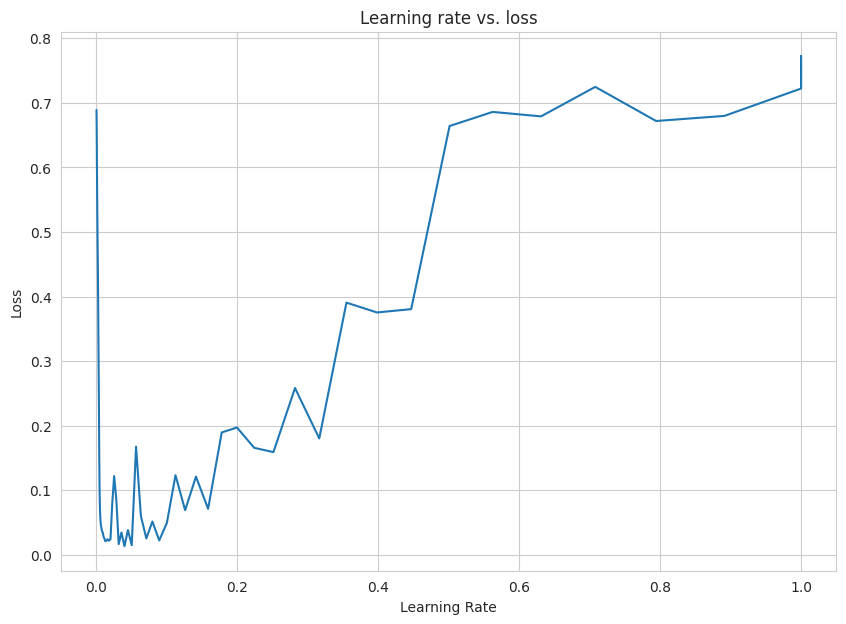

In [13]:
# what happend if dont use semilogx
plt.figure(figsize=(10, 7))
plt.plot(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

Model: "final_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_3 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93 (372.00 B)

 Trainable params: 93 (372.00 B)

 Non-trainable params: 0 (0.00 B)

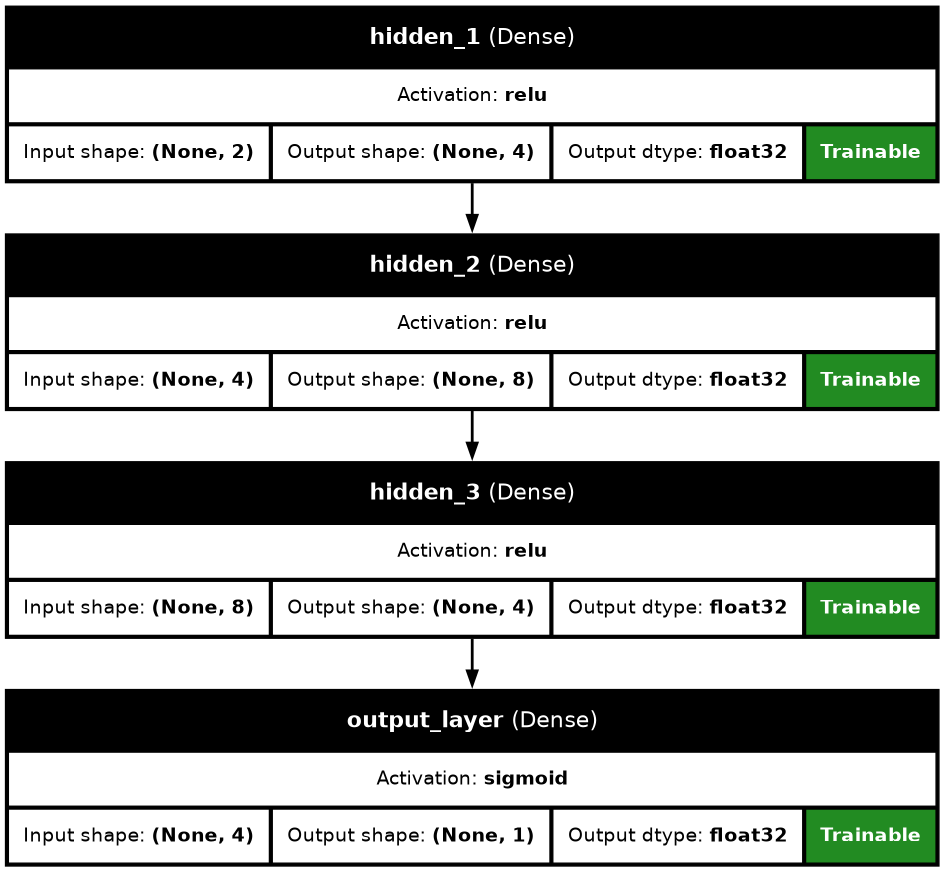

In [14]:
tf.random.set_seed(42)


model_2 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(2,), name='input_layer'),
    tf.keras.layers.Dense(units=4, name='hidden_1', activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=8, name='hidden_2', activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=4, name='hidden_3', activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=1, name='output_layer', activation=tf.keras.activations.sigmoid)
], name='final_model')

model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
               loss=tf.keras.losses.BinaryCrossentropy(),
               metrics=[tf.keras.metrics.BinaryAccuracy()])

model_2.summary()

plot_model(model_2, show_shapes=True, show_dtype=True, show_layer_names=True, 
           expand_nested=True, dpi=100, 
           show_layer_activations=True, show_trainable=True)

In [15]:
history = model_2.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.4807 - loss: 0.6945
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.7236 - loss: 0.6802 
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.7611 - loss: 0.6595 
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8059 - loss: 0.6208 
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8482 - loss: 0.5501 
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.9114 - loss: 0.4529 
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.9625 - loss: 0.3575 
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.9817 - loss: 0.2901 
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.9849 - loss: 0.2462 
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.9904 - loss: 0.2151 


In [16]:
model_2.evaluate(X_train, y_train)
model_2.evaluate(X_test, y_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.9876 - loss: 0.2039  
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9670 - loss: 0.2349  


[0.23464933037757874, 0.9599999785423279]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


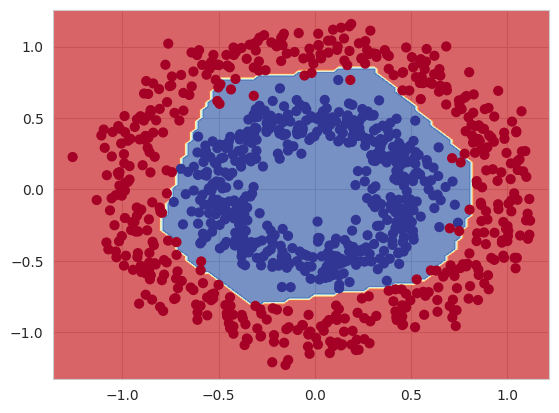

In [17]:
plot_decision_boundary(model_2, X, y)

<Axes: >

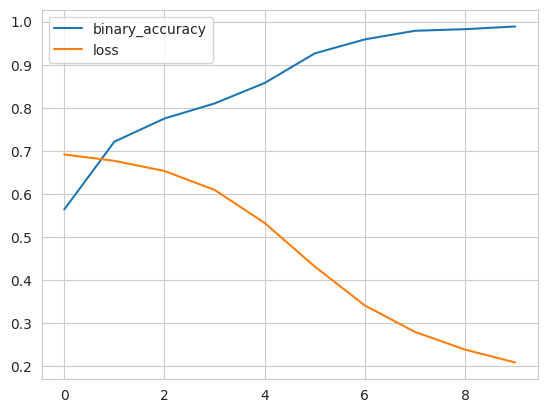

In [18]:
pd.DataFrame(history.history).plot()

### 🎯 Final Results: Model 2 Evaluation
With the adjusted learning rate and fewer epochs, here’s what we achieved:

1. **Evaluation Metrics**:
   - **Training Accuracy**: 99.18% 🚀
   - **Test Accuracy**: 98.09% 🎉
   - The loss values are impressively low, indicating strong performance on both datasets.

2. **Decision Boundary**:
   - The new model captures the circular pattern almost perfectly! 🟢🔴
   - The boundary is much more refined compared to the previous model, thanks to the optimal learning rate.

#### Conclusion:
This fine-tuned model demonstrates how adjusting the learning rate can dramatically improve accuracy and decision-making. Ready to tackle more challenges! 🚀


### 🌍 Real-World Application: Learning Rates and Challenges
In the real world, finding the **ideal learning rate** isn’t always as straightforward as in our example. Here’s what makes it tricky:

1. **Complex Data**:
   - Real-world data is often noisy, imbalanced, and way messier than simple circles. 📊
   - This requires extensive preprocessing and experimentation. 🔧

2. **Model Complexity**:
   - Larger models with more layers and parameters can behave unpredictably with learning rate changes. ⚙️
   - Fine-tuning often involves trial and error, and sometimes automated tools like **grid search** or **Bayesian optimization**. 🤖

3. **Training Time**:
   - Running multiple experiments to find the right learning rate can be computationally expensive. ⏳

Despite these challenges, using techniques like learning rate scheduling, early stopping, and robust data preprocessing can make a huge difference in training real-world models. 🚀

If you found this notebook helpful, don’t forget to **upvote** and share your thoughts! Your feedback helps improve future projects. 🙌
